### Тестовый стенд
* **CPU:** AMD® Ryzen 7 5800h with radeon graphics × 16 @ 4.46GHz

* **RAM:** 16 GB

* **OS:** Ubuntu 22.04.4 LTS (64-bit)

### Подготовка к измерениям

**Средство измерения:** библиотека time в python3

Перед проведением серии замеров, были проделаны следующие действия по подготовке ПК:

* отключены все обновления на устройстве;
* закрыты фоновые процессы;
* была установлена максимальная частота процессора:
```
sudo cpupower frequency-set -g performance && sudo cpupower frequency-set -d 4.46GHz -u 4.46GHz
```
* выключен swap:
```
sudo swapoff -a
```
* сброшен дисковый кэш:
```
sudo sh -c 'echo 3 >/proc/sys/vm/drop_caches'
```
* программа исполнена одним ядром:
```
taskset -c 0 python3 measurescript.py
```
* совершён прогрев из 10 проходов.


**Выборка** - 40 замеров

In [1]:
t = [2.978800287246704, 2.977645378112793, 2.9808559322357178, 2.983973970413208, 2.9830551052093506, 2.985217519760132, 2.9827992820739746, 2.9737138748168945, 2.9702684688568115, 2.970532646179199, 2.9767868518829346, 2.977541923522949, 2.975900888442993, 2.977146863937378, 2.975010395050049, 2.979825973510742, 2.981210470199585, 2.9768590927124023, 2.974181890487671, 2.9777612686157227, 2.9747142791748047, 2.978062868118286, 2.9788432121276855, 2.972687005996704, 2.9769341945648193, 2.977008104324341, 2.975972890853882, 2.9773285388946533, 2.9741439819335938, 2.9753193855285645, 2.981655321121216, 2.9747800827026367, 2.981269121170044, 2.9792537689208984, 2.9777793884277344, 2.9808237552642822, 2.976321220397949, 2.980615119934082, 2.980350971221924, 2.977914810180664]

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([2., 1., 4., 5., 9., 6., 4., 5., 2., 2.]),
 array([2.97026847, 2.97176337, 2.97325828, 2.97475318, 2.97624809,
        2.97774299, 2.9792379 , 2.9807328 , 2.98222771, 2.98372261,
        2.98521752]),
 <BarContainer object of 10 artists>)

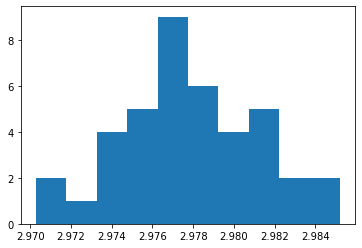

In [3]:
plt.hist(t)

In [4]:
stats.normaltest(t)

NormaltestResult(statistic=0.030868697708592328, pvalue=0.984684150272371)

In [5]:
stats.shapiro(t)

ShapiroResult(statistic=0.9878119471056335, pvalue=0.9378363750725837)

В обоих тестах pvalue > 0.05

**Среднее:**

In [6]:
np.mean(t)

2.9777716526031495

**Стандартное отклонение:**

In [7]:
np.std(t, ddof=1)

0.003397285553107677

**Стандартное отклонение среднего:**

In [8]:
np.std(t, ddof=1)/math.sqrt(len(t))

0.0005371580104902592

**Доверительный интервал 95%:**

In [9]:
stats.t.ppf(0.975, df = len(t) - 1)*stats.sem(t)

0.0010865046304436583

Итак, полученные данные с учётом округления:

**2.9778 ± 0.0011**

